# ANDES Demonstration of `DGPRCTExt` on IEEE 14-Bus System

Prepared by Jinning Wang. Last revised 12 September 2021.

## Background

Voltage signal is set manually to demonstrate `DGPRCTExt`.

In the modified IEEE 14-bus system, 10 `PVD1` are conencted to `Bus4`, and 1 `DGPRCTExt` is added aiming at `PVD1_2`.

## Conclusion

`DGPRCTExt` can be used to implement protection on `DG` models, where the voltage signal can be manipulated manually. This feature allows co-simulation where you can input the external voltage signal into ADNES by `set` function.

In [ ]:
!git clone -b develop https://github.com/Wenqi-Cui/andes_wq.git

Cloning into 'andes_wq'...
remote: Enumerating objects: 24694, done.
remote: Counting objects: 100% (1510/1510), done.
remote: Compressing objects: 100% (902/902), done.
remote: Total 24694 (delta 1040), reused 1008 (delta 598), pack-reused 23184
Receiving objects: 100% (24694/24694), 51.50 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (18968/18968), done.


In [ ]:
cd andes_wq

/content/andes_wq


In [ ]:
!pip install -r requirements.txt
!pip install -r requirements-dev.txt
!python setup.py install

     |████████████████████████████████| 12.2 MB 6.1 MB/s 
     |████████████████████████████████| 149 kB 38.6 MB/s 
     |████████████████████████████████| 81 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 2.3 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 296 kB 9.8 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 235 kB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 9.1 MB 67.0 MB/s 
     |████████████████████████████████| 3.3 MB 34.4 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 41 kB 44 kB/s 
     |████████████████████████████████| 195 kB 58.3 MB/s 
     |████████████████████████████████| 548 kB 45.0 MB/s 
     |████████████████████████████████| 42 kB 936 kB/s 
     |██████████████████████████████

running install
running bdist_egg
running egg_info
creating andes.egg-info
writing andes.egg-info/PKG-INFO
writing dependency_links to andes.egg-info/dependency_links.txt
writing entry points to andes.egg-info/entry_points.txt
writing requirements to andes.egg-info/requires.txt
writing top-level names to andes.egg-info/top_level.txt
writing manifest file 'andes.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
adding license file 'AUTHORS.rst'
writing manifest file 'andes.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tests
copying tests/__init__.py -> build/lib/tests
copying tests/test_snapshot.py -> build/lib/tests
copying tests/test_discrete.py -> build/lib/tests
copying tests/test_pflow_matpower.py -> build/lib/tests
copying tests/test_case.py -> build/lib/tests
copying tests/test_tds_resume.py -> build/lib/tests
copying 

In [ ]:
import andes
from andes.utils.paths import get_case
import numpy as np
import matplotlib.pyplot as plt
andes.config_logger(stream_level=30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ieee39

## init

In [ ]:
!andes misc -C

No output file found in the working directory.


In [ ]:
ss = andes.load(get_case('ieee39_wind.xlsx'),
                setup=False,
                no_output=False)

Generating code for 86 models on 1 processes.


REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}
REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}


In [ ]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]
ss.setup()
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0
ss.PFlow.run()

True

In [ ]:
ratiogen =0.7
num_RE = 10
ss.REGCA1.gammap.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.REGCA1.gammaq.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.GENROU.gammap.v[0:num_RE] = np.ones(num_RE)*ratiogen
ss.GENROU.gammaq.v[0:num_RE] = np.ones(num_RE)*ratiogen

#  = 0.2

In [ ]:
ss.GENROU.gammap.v

array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7])

In [ ]:
fault_time =1

ss.TDS.config.tf = fault_time
ss.TDS.run(tstep = 0.01, max_iter = 50)

GENROU (xl <= xd2) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_5 | 0.054  | 0.039
 GENROU_9 | 0.030  | 0.021


REECA1.dbV_db out of limits <dbd1>

idx | Flag | Input Value | Limit 
----+------+-------------+-------
 7  | zl   | -0.033      | -0.020


REECA1.dbV_db out of limits <dbd2>

idx | Flag | Input Value | Limit
----+------+-------------+------
 3  | zu   | 0.047       | 0.020
 4  | zu   | 0.033       | 0.020




 32%|#############4                            | 32/100 [00:00<00:00, 257.08%/s]


True

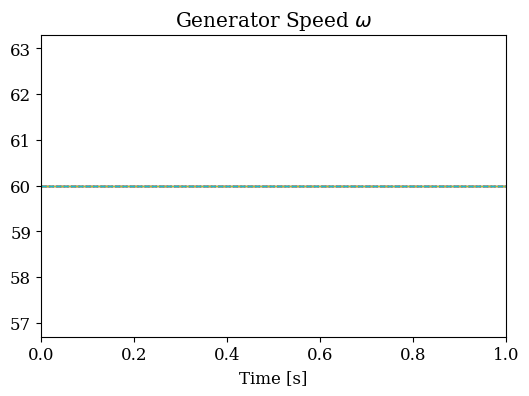

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbb03b42410>)

In [ ]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')


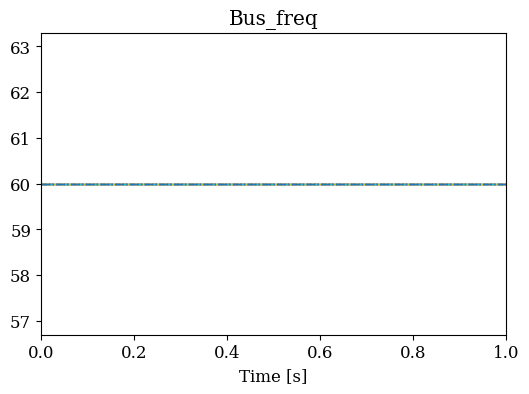

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbb03a4e790>)

In [ ]:
ss.TDS.plt.plot(ss.BusFreq.f,
                ycalc=lambda x:60*x,
                title='Bus_freq')
# ss.BusFreq.f.a

## step load change

In [ ]:
# ss.PQ.Ppf.v[0] =10
ss.PQ.Ppf.v[16] = 6

ss.TDS.config.tf =10
ss.TDS.run(tstep = 0.01, max_iter = 50)

100%|########################################| 100.0/100 [00:03<00:00, 25.35%/s]


True

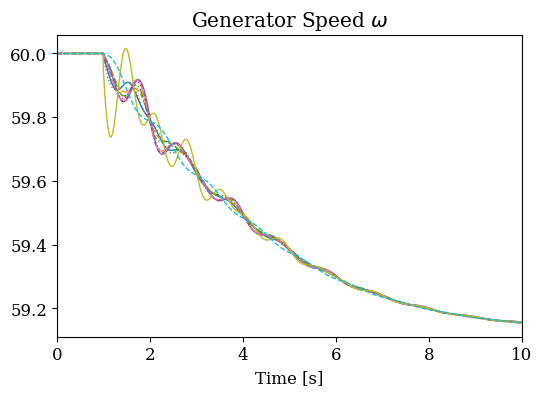

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbb03501410>)

In [ ]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')

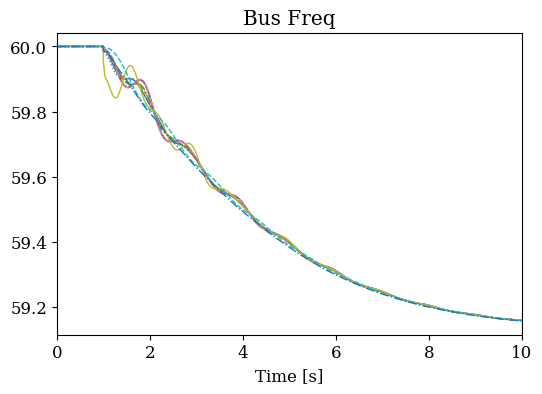

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbb034dbc90>)

In [ ]:
ss.TDS.plt.plot(ss.BusFreq.f,
                ycalc=lambda x:60*x,
                title='Bus Freq')

In [ ]:
ss.PQ.Ppf.v[17] = 5
ss.TDS.config.tf = fault_time+10
ss.TDS.run()

100%|#######################################| 100.0/100 [00:00<00:00, 140.04%/s]


True

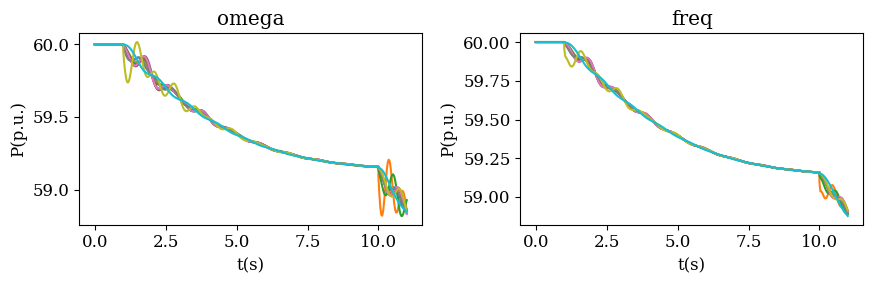

In [ ]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()


# With Linear Control

In [ ]:

!pip install mat4py
import collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import gym
import tensorflow as tf
import os
import random
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import RNN
import tensorflow.keras.backend as K
import sys
from gym import spaces
from gym.utils import seeding
import copy
from mat4py import loadmat
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
max_action=np.array([[0.19606592, 0.2190382 , 0.22375287, 0.0975513 , 0.29071101,
        0.22091283, 0.38759459, 0.56512538, 0.24151538, 0.29821917]],dtype=np.float32)*1.
linear_coff=np.array([[ 2.2347659,   2.720281 ,   2.4595585,  43.59709  ,   5.7675405,
          2.3880444, 156.02136  ,  12.0558605,   2.8042254,  25.922562  ]], dtype=np.float32)*1
max_action = max_action.reshape(-1)
linear_coff = linear_coff.reshape(-1)

In [ ]:
def Action_linear(pref0_init, linear_coff, idexs, max_action):
    action_nonconstrain =  - (ss.BusFreq.f.v[idexs]-1)*60*linear_coff[idexs]
    action=max_action[idexs]-tf.nn.relu(max_action[idexs]-action_nonconstrain)+tf.nn.relu(-max_action[idexs]-action_nonconstrain)
    return pref0_init[idexs]+action

## init

In [ ]:
!andes misc -C

"/content/andes_wq/ieee39_wind_wenqiv1_out.txt" removed.
"/content/andes_wq/ieee39_wind_wenqiv1_out.npz" removed.
"/content/andes_wq/ieee39_wind_wenqiv1_out.lst" removed.


In [ ]:
ss = andes.load(get_case('ieee39_wind.xlsx'),
                setup=False,
                no_output=False)

REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}
REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}


In [ ]:

# ss.REGCA1.allow_adjust = True
# ss.REGCA1.allow_adjust = True

In [ ]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]
ss.setup()
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0
ss.PFlow.run()

True

In [ ]:
ss.BusFreq.Tf.v[0:10] = 0.04*np.ones(10)
ss.BusFreq.Tw.v[0:10] = 0.03*np.ones(10)

In [ ]:
ratiogen =0.7
num_RE = 10
ss.REGCA1.gammap.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.REGCA1.gammaq.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.GENROU.gammap.v[0:num_RE] = np.ones(num_RE)*ratiogen
ss.GENROU.gammaq.v[0:num_RE] = np.ones(num_RE)*ratiogen

#  = 0.2

In [ ]:
fault_time =1

ss.TDS.config.tf = fault_time
ss.TDS.run(tstep = 0.01, max_iter = 50)

GENROU (xl <= xd2) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_5 | 0.054  | 0.039
 GENROU_9 | 0.030  | 0.021


REECA1.dbV_db out of limits <dbd1>

idx | Flag | Input Value | Limit 
----+------+-------------+-------
 7  | zl   | -0.033      | -0.020


REECA1.dbV_db out of limits <dbd2>

idx | Flag | Input Value | Limit
----+------+-------------+------
 3  | zu   | 0.047       | 0.020
 4  | zu   | 0.033       | 0.020





 32%|#############7                             | 32/100 [00:00<00:00, 77.92%/s]


True

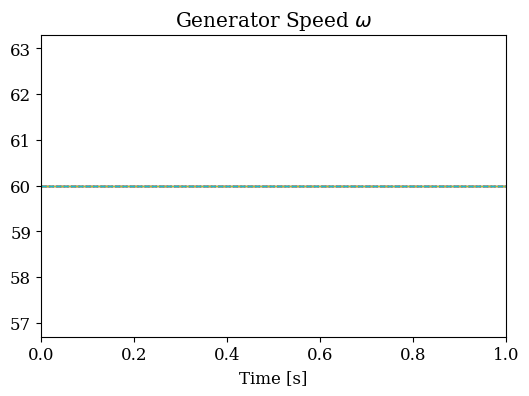

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcab9896f10>)

In [ ]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')


## Apply the control

In [ ]:

ss.PQ.Ppf.v[16] = 6



In [ ]:
pref0_init = ss.REECA1.p0.v.copy()

In [ ]:
step_t = 0.02
tstart =fault_time
TimeLength = tstart+10
idexs = np.arange(0,10)
for t in np.arange(tstart, TimeLength, step_t):
    ss.REECA1.alter("p0", ss.REECA1.idx.v, Action_linear(pref0_init, linear_coff, idexs, max_action))
    ss.TDS.config.tf = t
    ss.TDS.run(tstep = 0.01)


100%|####################################| 100.0/100 [00:00<00:00, 401753.26%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 366.08%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 495.25%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 592.33%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 701.83%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 818.56%/s]

  0%|                                                    | 0/100 [00:00<?, ?%/s]
100%|################

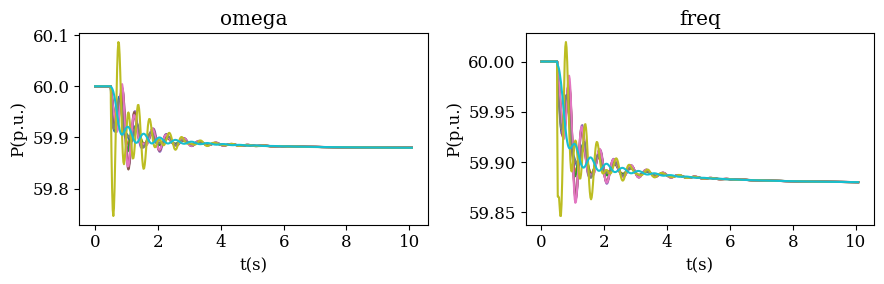

In [ ]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 15
TimeStep = np.size(ListTime)-20
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()

## compare power command and output power

In [ ]:
ListTime = ss.dae.ts.t
ListRePref = ss.dae.ts.y[:,ss.REECA1.Pref.a]
ListRePe = ss.dae.ts.y[:,ss.REECA1.Pe.a]


In [ ]:
np.size(ListTime )

535

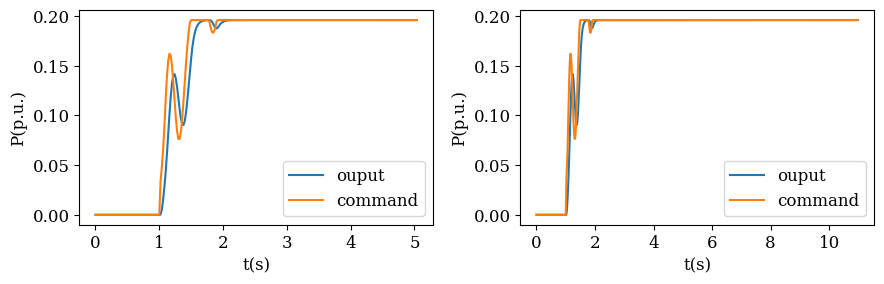

In [ ]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)-300
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
TimeStep = 800

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

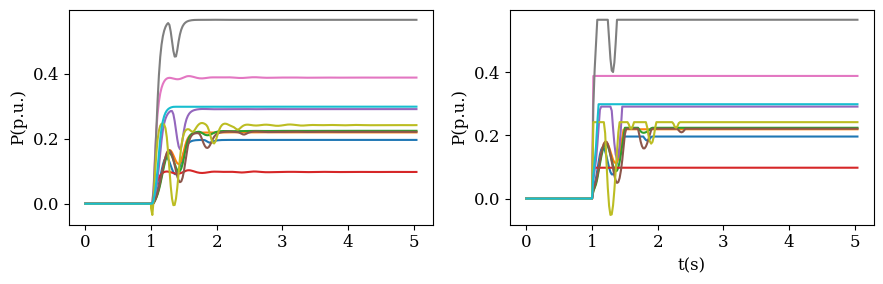

In [ ]:
plt_idx = np.arange(0, 10)
TimeStep_start = 0
TimeStep = np.size(ListTime)-300
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.ylabel('P(p.u.)')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 0
# TimeStep = 300
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()
fig.tight_layout()

## Compare omega

In [ ]:
ss.BusFreq.f

Algeb: BusFreq.f, a=[481 482 483 484 485 486 487 488 489 490 491], v=[0.99799768 0.99799767 0.99799767 0.99799772 0.99799772 0.99799772
 0.99799772 0.99799769 0.99799771 0.99799761 0.99799757], e=[ 0.00000000e+00  0.00000000e+00 -2.22044605e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

In [ ]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz


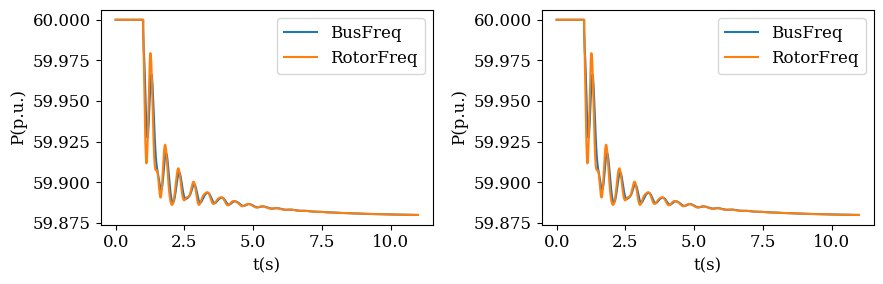

In [ ]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
TimeStep_start = 0
TimeStep = np.size(ListTime)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

# With NN

In [ ]:
# save the data
import pickle

f = open('Weights_RNN.pckl', 'rb')

[w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN]= pickle.load(f)
f.close()

In [ ]:
ones_frequency=tf.ones((10,20),dtype=tf.float32)

def Action_RNN(w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN, pref0_init, idexs, max_action):
    state =   tf.reshape(tf.constant((ss.BusFreq.f.v[idexs]-1)*60,dtype=tf.float32), (1,-1))
    nonlinear_plus=K.sum(K.relu(K.dot(tf.linalg.diag(state),ones_frequency)+b_plus_RNN)\
                    *w_plus_RNN,axis=2)
    nonlinear_minus=K.sum(K.relu(-K.dot(tf.linalg.diag(state),ones_frequency)+b_minus_RNN)\
                    *w_minus_RNN,axis=2)
    action_nonconstrain=tf.reshape( nonlinear_plus+nonlinear_minus, -1).numpy()
    # print('action_nonconstrain', action_nonconstrain[0])
    # print (action_nonconstrain[idexs])
    action = max_action[idexs]-tf.nn.relu(max_action[idexs]-action_nonconstrain[idexs])+tf.nn.relu(-max_action[idexs]-action_nonconstrain[idexs])
    return action

## init

In [ ]:
!andes misc -C

"/content/andes_wq/ieee39_wind_wenqiv1_out.txt" removed.
"/content/andes_wq/ieee39_wind_wenqiv1_out.npz" removed.
"/content/andes_wq/ieee39_wind_wenqiv1_out.lst" removed.


In [ ]:
ss = andes.load(get_case('ieee39_wind.xlsx'),
                setup=False,
                no_output=False)

REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}
REGCA1: unused data {'Iqfrz': 0.0, 'Thld': -2.0, 'Thld2': 1.0, 'Tp': 0.02, 'QMax': 999.0, 'QMin': -999.0, 'VMAX': 999.0, 'VMIN': -999.0, 'Kqp': 1.0, 'Kqi': 0.1, 'Kvp': 1.0, 'Kvi': 0.1, 'Vref1': 1.03, 'Tiq': 0.02, 'dPmax': 999.0, 'dPmin': -999.0, 'PMAX': 999.0, 'PMIN': -999.0, 'Imax': 10.0, 'Tpord': 0.02, 'Vq1': 0.2, 'Iq1': 2.0, 'Vq2': 0.4, 'Iq2': 4.0, 'Vq3': 0.8, 'Iq3': 8.0, 'Vq4': 1.0, 'Iq4': 10.0, 'Vp1': 0.2, 'Ip1': 2.0, 'Vp2': 0.4, 'Ip2': 4.0, 'Vp3': 0.8, 'Ip3': 8.0, 'Vp4': 1.0, 'Ip4': 10.0}


In [ ]:
Pm=np.array([ -0.19983394, -0.25653884, -0.25191885, -0.10242008, -0.34510365,\
         0.23206371,  0.4404325 ,  0.5896664 ,  0.26257738, -0.36892462])
dim_PQ = 19
dim_PV = 13
dim_bus = 39
adjust_ratio = 1
ss.PV.p0.v[0:9] = np.array(ss.PV.p0.v[0:9])*adjust_ratio + Pm[0:9]
ss.Slack.p0.v[0] = np.array(ss.Slack.p0.v[0])*adjust_ratio + Pm[-1]
ss.setup()
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0
ss.PFlow.run()

True

In [ ]:
ss.BusFreq.Tf.v[0:10] = 0.04*np.ones(10)
ss.BusFreq.Tw.v[0:10] = 0.03*np.ones(10)

In [ ]:
ratiogen =0.7
num_RE = 10
ss.REGCA1.gammap.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.REGCA1.gammaq.v[0:num_RE] = np.ones(num_RE)*(1-ratiogen)
ss.GENROU.gammap.v[0:num_RE] = np.ones(num_RE)*ratiogen
ss.GENROU.gammaq.v[0:num_RE] = np.ones(num_RE)*ratiogen


In [ ]:
ss.GENROU.gammap.v

array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7])

In [ ]:
fault_time =1

ss.TDS.config.tf = fault_time
ss.TDS.run(tstep = 0.01, max_iter = 50)

GENROU (xl <= xd2) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_5 | 0.054  | 0.039
 GENROU_9 | 0.030  | 0.021


REECA1.dbV_db out of limits <dbd1>

idx | Flag | Input Value | Limit 
----+------+-------------+-------
 7  | zl   | -0.033      | -0.020


REECA1.dbV_db out of limits <dbd2>

idx | Flag | Input Value | Limit
----+------+-------------+------
 3  | zu   | 0.047       | 0.020
 4  | zu   | 0.033       | 0.020




 32%|#############4                            | 32/100 [00:00<00:00, 227.01%/s]


True

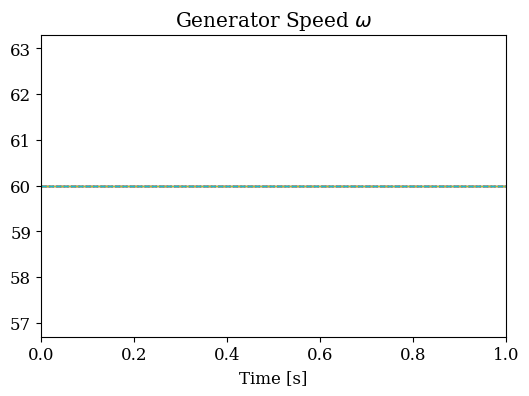

(<Figure size 600x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b3a9acfd0>)

In [ ]:
ss.TDS.plt.plot(ss.GENROU.omega,
                ycalc=lambda x:60*x,
                title='Generator Speed $\omega$')


## Apply the control

In [ ]:

ss.PQ.Ppf.v[16] = 6


In [ ]:
pref0_init = ss.REECA1.p0.v.copy()

In [ ]:
step_t = 0.02
tstart =fault_time
TimeLength = tstart+10
idexs = np.arange(0,10)
for t in np.arange(tstart, TimeLength, step_t):
    ss.REECA1.alter("p0", ss.REECA1.idx.v, \
                    pref0_init[idexs]-\
                    Action_RNN(w_plus_RNN, b_plus_RNN, w_minus_RNN, b_minus_RNN, pref0_init, idexs, max_action))
    ss.TDS.config.tf = t
    ss.TDS.run(tstep = 0.01)

100%|####################################| 100.0/100 [00:00<00:00, 424095.45%/s]
100%|#######################################| 100.0/100 [00:00<00:00, 842.42%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1356.77%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1571.70%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1403.50%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1447.67%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1337.08%/s]
100%|######################################| 100.0/100 [00:00<00:00, 1878.12%/s]
100%|######################################| 100.0/100 [00:00<00:00, 2357.98%/s]
100%|######################################| 100.0/100 [00:00<00:00, 2048.39%/s]
100%|######################################| 100.0/100 [00:00<00:00, 2154.57%/s]
100%|######################################| 100.0/100 [00:00<00:00, 2116.33%/s]
100%|#######################

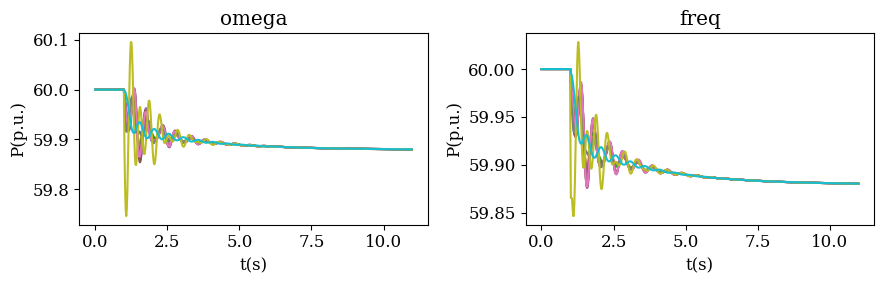

In [ ]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz
plt_idx = np.arange(0,10)
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('omega')
# plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
# TimeStep = 800
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.title('freq')

# plt.legend()
fig.tight_layout()

## compare power command and output power

In [ ]:
ListTime = ss.dae.ts.t
ListRePref = ss.dae.ts.y[:,ss.REECA1.Pref.a]
ListRePe = ss.dae.ts.y[:,ss.REECA1.Pe.a]


In [ ]:
np.size(ListTime )

535

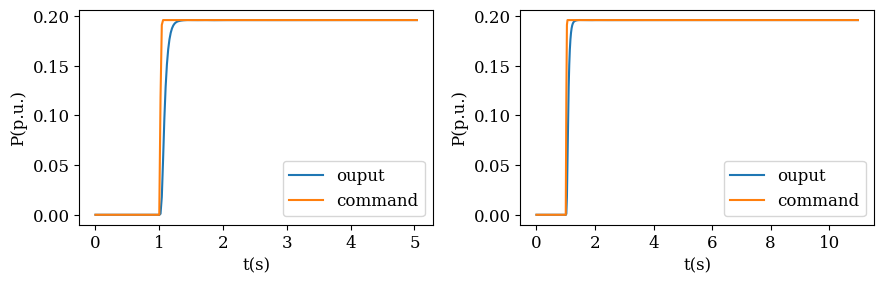

In [ ]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)-300
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
# TimeStep_start = 560
TimeStep = 800

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()

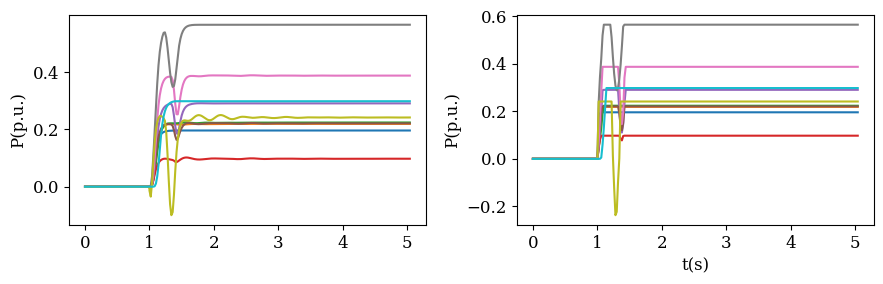

In [ ]:
plt_idx = np.arange(0, 10)
TimeStep_start = 0
TimeStep = np.size(ListTime)-300
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePe[TimeStep_start:TimeStep, plt_idx]-ListRePe[0, plt_idx], label='ouput')
plt.ylabel('P(p.u.)')

plt.subplot(1,2,2)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], \
         ListRePref[TimeStep_start:TimeStep, plt_idx]-ListRePref[0, plt_idx], label='command')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
# plt.legend()
fig.tight_layout()

## Compare omega

In [ ]:
ss.BusFreq.f

Algeb: BusFreq.f, a=[481 482 483 484 485 486 487 488 489 490 491], v=[0.99800421 0.99800419 0.99800419 0.99800425 0.99800426 0.99800425
 0.99800425 0.99800422 0.99800425 0.99800414 0.99800406], e=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

In [ ]:
ListTime = ss.dae.ts.t
ListFreq = ss.dae.ts.y[:,ss.BusFreq.f.a]*60 #Hz
ListOmega= ss.dae.ts.x[:,ss.GENROU.omega.a]*60 #Hz


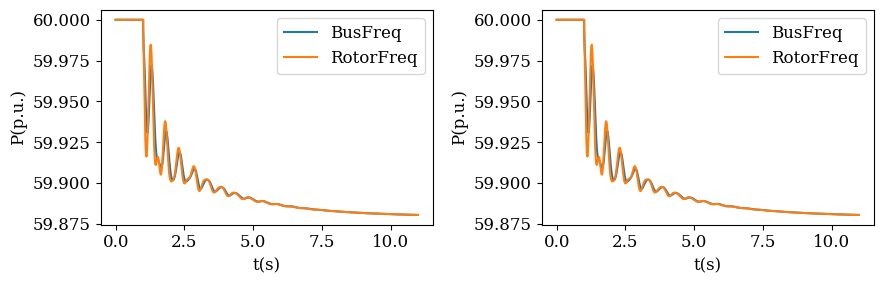

In [ ]:
plt_idx = [0]
TimeStep_start = 0
TimeStep = np.size(ListTime)
fig = plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1,2,1)

plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()

plt.subplot(1,2,2)
TimeStep_start = 0
TimeStep = np.size(ListTime)
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListFreq[TimeStep_start:TimeStep, plt_idx], label='BusFreq')
plt.plot(ListTime[TimeStep_start:TimeStep]-ListTime[TimeStep_start ], ListOmega[TimeStep_start:TimeStep, plt_idx], label='RotorFreq')
plt.xlabel('t(s)')
plt.ylabel('P(p.u.)')
plt.legend()
fig.tight_layout()